In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings

warnings.filterwarnings('ignore')

In [25]:
df_total = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/COVID-Alura/main/cases-brazil-states.csv")
df_total['data'] = pd.to_datetime(df_total['data']).dt.date
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [26]:
df_sp = df_total[df_total['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [27]:
!pip install statsmodels==0.12.1

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [29]:
resultados = seasonal_decompose(df_sp.novosObitos, freq=7)
resultados

In [30]:
df_sp.index = pd.to_datetime(df_sp.data)

In [43]:
def plotar(y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,10))
    plt.plot(y1,color=cor1, label=label1)
    plt.plot(y2,color=cor2, label=label2)
    plt.plot(y3,color=cor3, label=label3)
    plt.legend(fontsize=18)
    

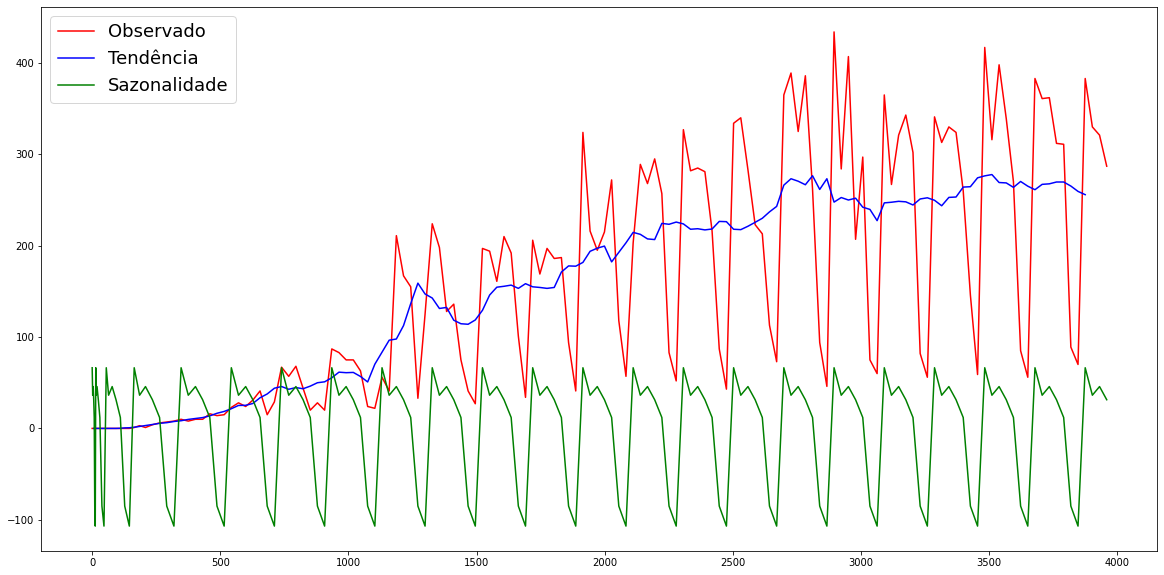

In [44]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green', 'Observado', 'Tendência','Sazonalidade')

In [55]:
df_mg = df_total[df_total['estado'] == 'MG']
df_rj = df_total[df_total['estado'] == 'RJ']
df_sp = df_total[df_total['estado'] == 'SP']
df_sp.index = pd.to_datetime(df_sp.data)
df_mg.index = pd.to_datetime(df_mg.data)
df_rj.index = pd.to_datetime(df_rj.data)

In [56]:
resultados_mg = seasonal_decompose(df_mg.novosObitos, freq=7)
resultados_rj = seasonal_decompose(df_rj.novosObitos, freq=7)
resultados_sp = seasonal_decompose(df_sp.novosObitos, freq=7)

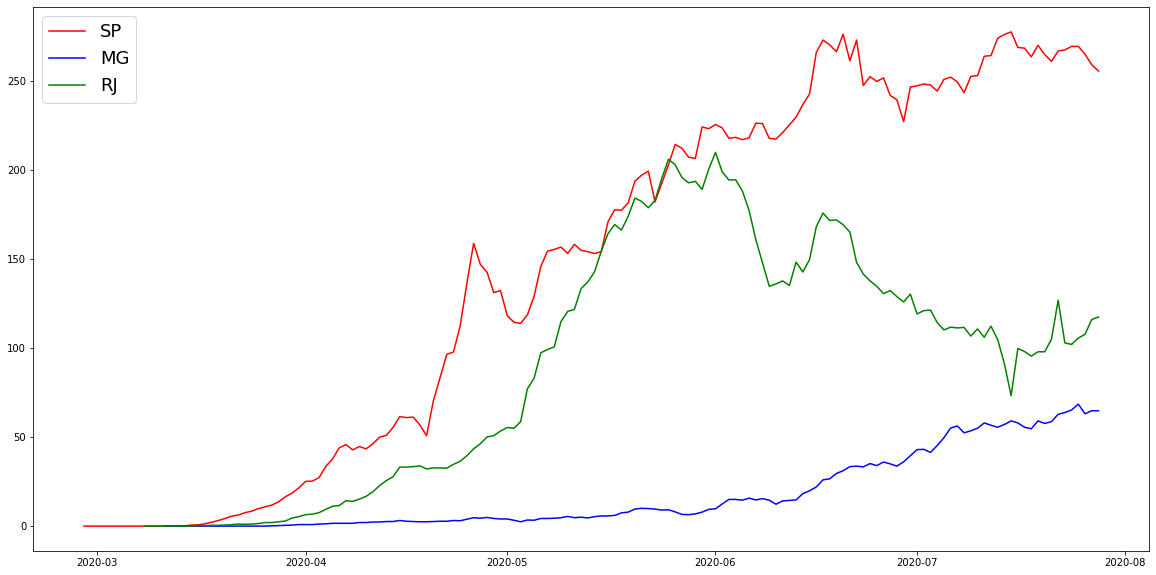

In [57]:
plotar(resultados_sp.trend, resultados_mg.trend, resultados_rj.trend, 'red','blue','green', 'SP', 'MG','RJ')

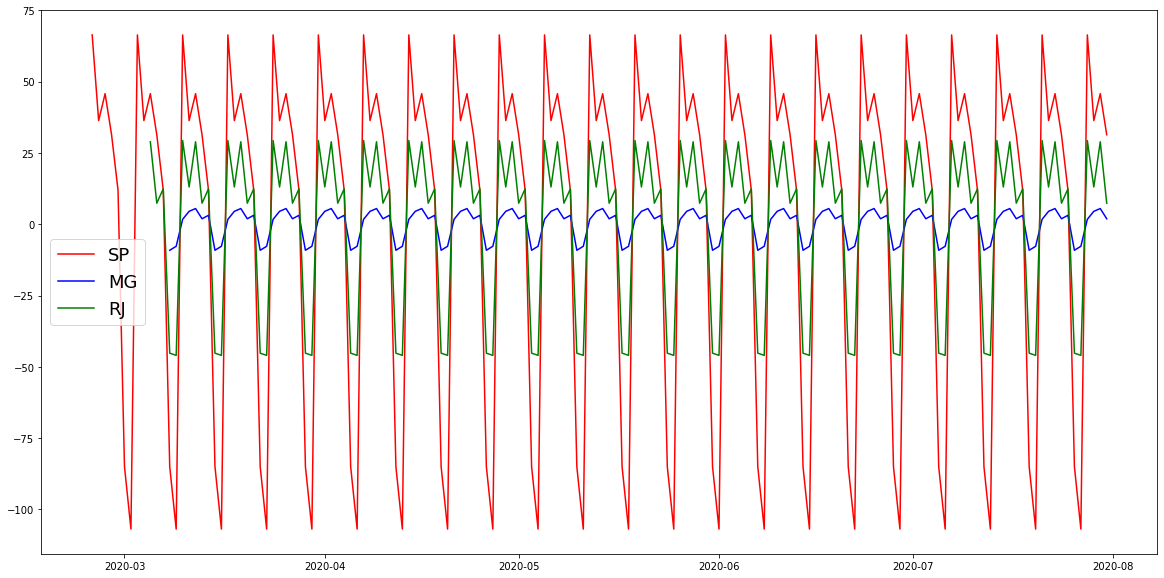

In [58]:
plotar(resultados_sp.seasonal, resultados_mg.seasonal, resultados_rj.seasonal, 'red','blue','green', 'SP', 'MG','RJ')

In [68]:
y = df_sp['Casos']
y.head()

data
2020-02-25    1
2020-02-26    1
2020-02-27    1
2020-02-28    2
2020-02-29    2
Name: Casos, dtype: int64

In [69]:
from statsmodels.tsa.stattools import adfuller
adfuller(y.dropna())

In [71]:
print('p-valor', adfuller(y.dropna())[1])

p-valor 0.9969563888815705


In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [73]:
def plotarACF(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1, ax=ax1, title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2, ax=ax2, title='1 Diff')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3, ax=ax3, title='2 Diff')

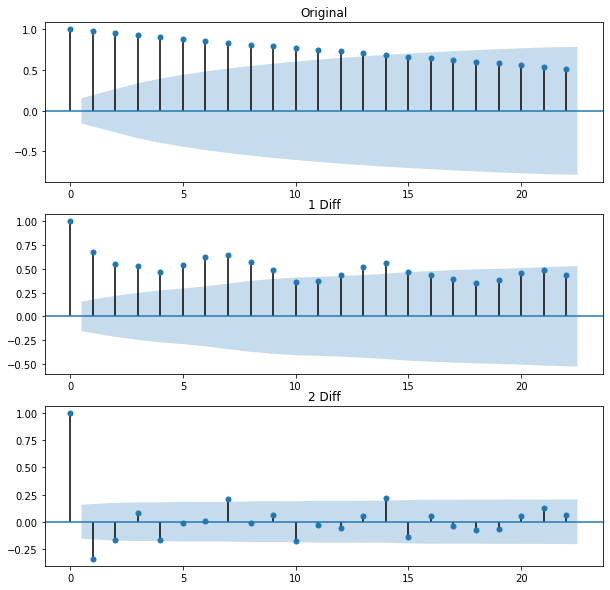

In [74]:
plotarACF(y, y.diff().dropna(),y.diff().diff().dropna())

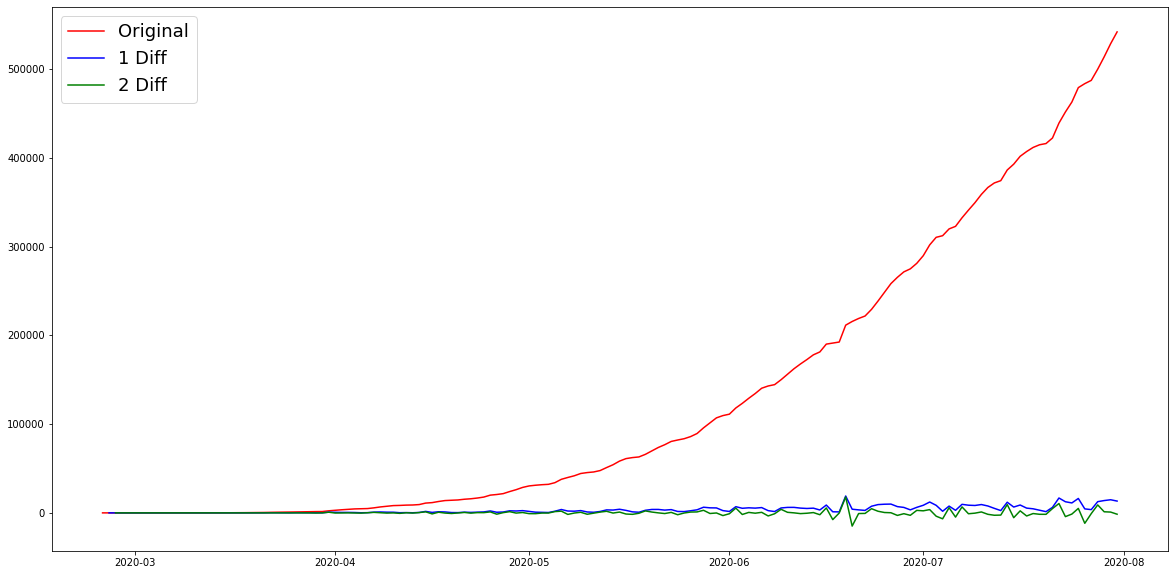

In [75]:
plotar(y, y.diff(),y.diff().diff(),'red','blue','green','Original','1 Diff','2 Diff')

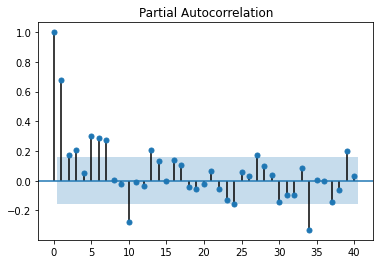

In [77]:
plot_pacf(y.diff().dropna(),lags=40);

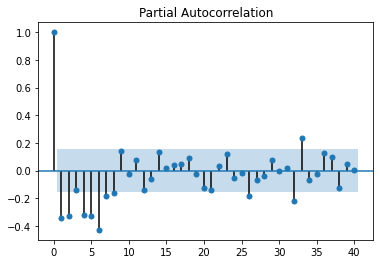

In [78]:
plot_pacf(y.diff().diff().dropna(),lags=40);

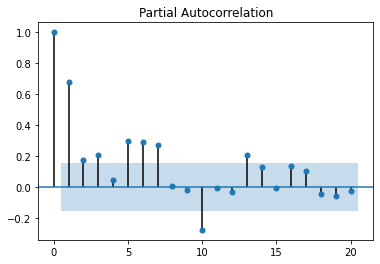

In [79]:
plot_pacf(y.diff().dropna(),lags=20);

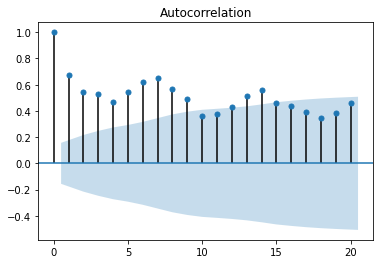

In [80]:
plot_acf(y.diff().dropna(),lags=20);

In [81]:
from statsmodels.tsa.arima_model import ARIMA

In [87]:
modelo = ARIMA(y,order=(1,1,1))

In [88]:
modelo_fit = modelo.fit(disp=0)

In [90]:
print(modelo_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Casos   No. Observations:                  157
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1457.921
Method:                       css-mle   S.D. of innovations           2589.036
Date:                Tue, 08 Feb 2022   AIC                           2923.842
Time:                        11:51:13   BIC                           2936.067
Sample:                    02-26-2020   HQIC                          2928.807
                         - 07-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4721.3975   4360.472      1.083      0.279   -3824.971    1.33e+04
ar.L1.D.Casos     0.9966      0.005    214.809      0.000       0.988       1.006
ma.L1.D.Casos    -0.8462      0.040    -

In [91]:
import itertools

In [94]:
p = d= q =range(0,2)
pdq =list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]

In [96]:
print('Exemplo de combinação de parametros para o ARIMA Sazonal')
print(f'SARIMAX {pdq[0]} x {seasonal_pdq[0]}')
print(f'SARIMAX {pdq[1]} x {seasonal_pdq[1]}')
print(f'SARIMAX {pdq[2]} x {seasonal_pdq[2]}')

Exemplo de combinação de parametros para o ARIMA Sazonal
SARIMAX (0, 0, 0) x (0, 0, 0, 7)
SARIMAX (0, 0, 1) x (0, 0, 1, 7)
SARIMAX (0, 1, 0) x (0, 1, 0, 7)


In [97]:
y =df_sp['Casos']
y

data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64

In [98]:
import statsmodels.api as sm

In [101]:
aic_lista = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order= param_seasonal)
        results = mod.fit()
        aic_lista.append(f'ARIMA{param}x{param_seasonal} - {results.aic}')

In [102]:
aic_lista

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - 4312.204463385908',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - 4234.919433193483',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - 3562.871711196248',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - 3494.15826807561',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - 3852.013673040989',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - 3640.408782017257',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - 3149.446118108346',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - 3148.6559906250286',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - 4203.6371531569',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - 4186.578948235748',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - 3367.09278156017',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - 3273.051935821917',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - 4175.643287398119',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - 4177.533546287219',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - 3366.959619996396',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - 3417.5740520198874',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - 3140.724225355021',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - 3055.298224835011',
 'ARIMA(0, 1, 0)x(0, 1, 0, 7) - 2802.474674572399',
 'ARIMA(0, 1, 

In [104]:
mod = sm.tsa.statespace.SARIMAX(y, order= (1,1,1), sesasonal_order=(1,1,1,7))
results = mod.fit()

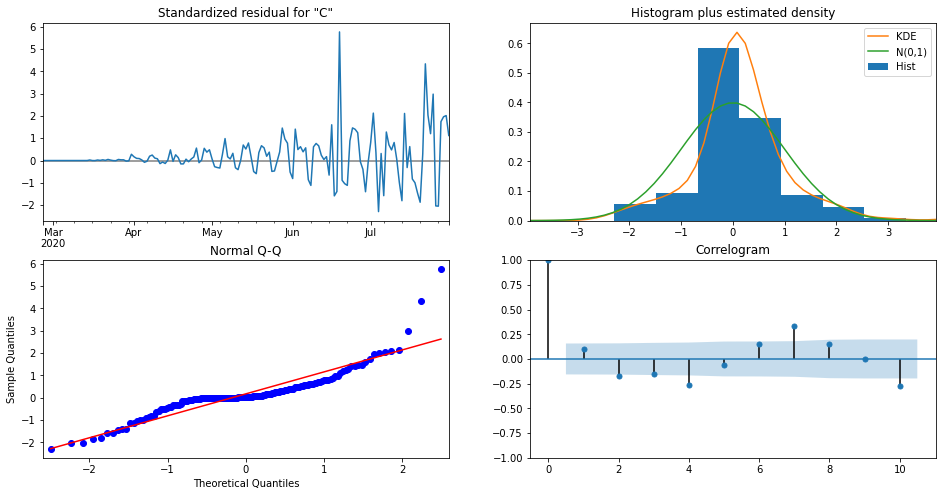

In [106]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [107]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'), dynamic=False)
pred_ic = pred.conf_int()
pred_ic

,lower Casos,upper Casos
2020-07-01,282748.382646,292875.208164
2020-07-02,291627.922612,301754.748130
2020-07-03,304710.733978,314837.559496
2020-07-04,313375.559531,323502.385048
2020-07-05,314300.348428,324427.173945
2020-07-06,322073.960463,332200.785980
2020-07-07,324343.245343,334470.070861
2020-07-08,334485.868404,344612.693922
2020-07-09,343420.407887,353547.233404
2020-07-10,351958.598106,362085.423623


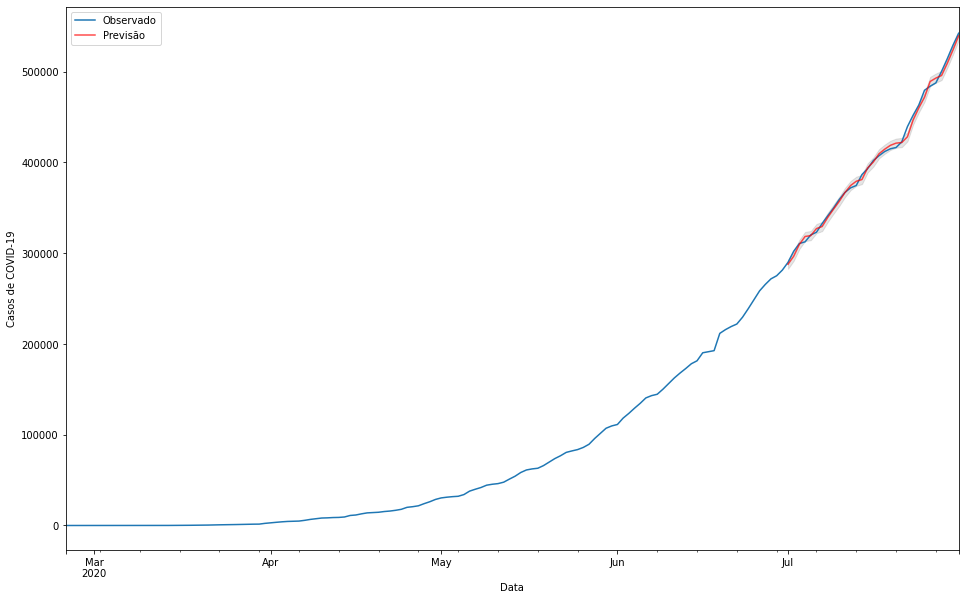

In [110]:
ax = y['2020':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(16,10))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()

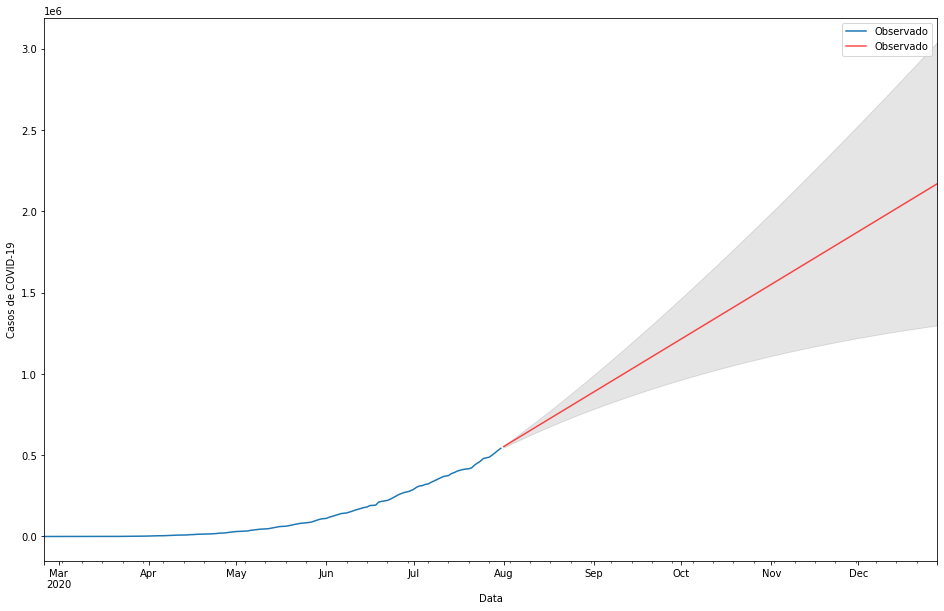

In [111]:
pred_uc = results.get_forecast(steps=150)
pred_ic = pred_uc.conf_int()

ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Observado', color='r', alpha=0.7, figsize=(16,10))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()

In [ ]:
df